## Getting the data

http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

Copy the table from this link and paste it into a csv file named `dataset_uncleaned.csv`. Then follow the next steps for preprocessing.

## Cleaning our data

In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score

In [2]:
import csv
from collections import defaultdict

disease_list = []

def return_list(disease):
    disease_list = []
    match = disease.replace('^','_').split('_')
    ctr = 1
    for group in match:
        if ctr%2==0:
            disease_list.append(group)
        ctr = ctr + 1

    return disease_list

with open("Scraped-Data/dataset_uncleaned.csv") as csvfile:
    reader = csv.reader(csvfile)
    disease=""
    weight = 0
    disease_list = []
    dict_wt = {}
    dict_=defaultdict(list)
    for row in reader:

        if row[0]!="\xc2\xa0" and row[0]!="":
            disease = row[0]
            #print(disease)
            disease_list = return_list(disease)
            #print(disease_list)
            weight = row[1]

        if row[2]!="\xc2\xa0" and row[2]!="":
            symptom_list = return_list(row[2])
            #print(symptom_list)

            for d in disease_list:
                for s in symptom_list:
                    dict_[d].append(s)
                dict_wt[d] = weight
                
    print(dict_)

   #print (dict_)
  #print(disease)

defaultdict(<class 'list'>, {'hypertensive disease': ['pain chest', 'shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope', 'vertigo', 'sweat', 'sweating increased', 'palpitation', 'nausea', 'angina pectoris', 'pressure chest'], 'diabetes': ['polyuria', 'polydypsia', 'shortness of breath', 'pain chest', 'asthenia', 'nausea', 'orthopnea', 'rale', 'sweat', 'sweating increased', 'unresponsiveness', 'mental status changes', 'vertigo', 'vomiting', 'labored breathing'], 'depression mental': ['feeling suicidal', 'suicidal', 'hallucinations auditory', 'feeling hopeless', 'weepiness', 'sleeplessness', 'motor retardation', 'irritable mood', 'blackout', 'mood depressed', 'hallucinations visual', 'worry', 'agitation', 'tremor', 'intoxication', 'verbal auditory hallucinations', 'energy increased', 'difficulty', 'nightmare', 'unable to concentrate', 'homelessness'], 'depressive disorder': ['feeling suicidal', 'suicidal', 'hallucinations auditory', 'feeling hopeless', 'weepiness', 'sleeple

Writing our cleaned data

In [3]:
with open("Scraped-Data/dataset_clean.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in dict_.items():
        for v in values:
            #key = str.encode(key)
            key = str.encode(key).decode('utf-8')
            #.strip()
            #v = v.encode('utf-8').strip()
            #v = str.encode(v)
            writer.writerow([key,v,dict_wt[key]])

In [4]:
columns = ['Source','Target','Weight']

In [5]:
data = pd.read_csv("Scraped-Data/dataset_clean.csv",names=columns, encoding ="ISO-8859-1")

In [6]:
data.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [7]:
data.to_csv("Scraped-Data/dataset_clean.csv",index=False)

## Analysing our cleaned data

In [8]:
data = pd.read_csv("Scraped-Data/dataset_clean.csv", encoding ="ISO-8859-1")

In [9]:
data.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [10]:
len(data['Source'].unique())

149

In [11]:
len(data['Target'].unique())

405

In [12]:
df = pd.DataFrame(data)

In [13]:
df_1 = pd.get_dummies(df.Target)

In [14]:
df_1.corr

<bound method DataFrame.corr of       Heberden's node  Murphy's sign  Stahli's line  abdomen acute  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
5                   0              0              0              0   
6                   0              0              0              0   
7                   0              0              0              0   
8                   0              0              0              0   
9                   0              0              0              0   
10                  0              0              0              0   
11                  0              0              0              0   
12                  0              0              0       

In [15]:
df.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [16]:
df_s = df['Source']

In [17]:
df_pivoted = pd.concat([df_s,df_1], axis=1)

In [18]:
df_pivoted.drop_duplicates(keep='first',inplace=True)

In [19]:
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
len(df_pivoted)

2116

In [21]:
cols = df_pivoted.columns

In [22]:
cols = cols[1:]

In [23]:
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,HIV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pneumocystis carinii pneumonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accident cerebrovascular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acquired immuno-deficiency syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
len(df_pivoted)

149

In [25]:
df_pivoted.to_csv("Scraped-Data/df_pivoted.csv", encoding = 'utf-8', index = False)

In [26]:
x = df_pivoted[cols]
y = df_pivoted['Source']

### Trying out our classifier to learn diseases from the symptoms

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Training a decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [29]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Acurracy: ", clf_dt.score(x,y))

DecisionTree
Acurracy:  0.89932885906


In [30]:
res1=clf_dt.score(x,y)

In [31]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='DOT-files/tree.dot', 
                feature_names=cols)

In [32]:
from IPython.display import Image
Image(filename='tree.png')

According to the plotted decision tree, `Jugular venous distention` is the attribute symptom that has the highest gini score of 0.9846. Thus this symptom would play a major role in predicting diseases.
<hr>

In [33]:
from sklearn.externals import joblib

In [34]:
joblib.dump(clf_dt, 'best_model.pkl')

['best_model.pkl']

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan', p=1)
klf=knn_classifier.fit(x,y)

In [37]:
print ("Acurracy: ", klf.score(x,y))
res2=klf.score(x,y)

Acurracy:  0.275167785235


In [38]:
from sklearn.svm import SVC
linsvm_classifier = SVC(kernel = 'rbf',random_state = 0)
linf=linsvm_classifier.fit(x,y)

In [39]:
print("accuracy linear svm:",linf.score(x,y))
res3=linf.score(x,y)

accuracy linear svm: 0.89932885906


In [40]:
print ("Acurracy: ", klf.score(x,y))

Acurracy:  0.275167785235


In [41]:
joblib.dump(klf, 'best_model2.pkl')

['best_model2.pkl']

In [42]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
gaussf=nb_classifier.fit(x,y)

In [43]:
print("ACCUracy gaussian",gaussf.score(x,y))
res4=gaussf.score(x,y)

ACCUracy gaussian 0.89932885906


In [44]:
joblib.dump(gaussf, 'best_model3.pkl')

['best_model3.pkl']

In [45]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
regression=lr_classifier.fit(x,y)
regression.score(x,y)

0.89932885906040272

In [46]:
res5=regression.score(x,y)
res5

0.89932885906040272

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random=rf_classifier.fit(x,y) 

In [48]:
random.score(x,y)

0.89932885906040272

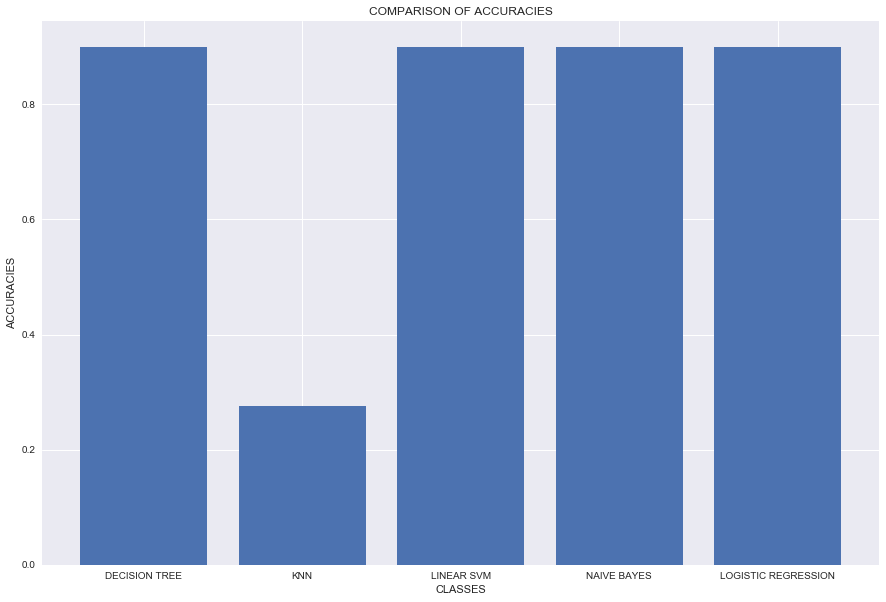

In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import matplotlib.pyplot as plt
plt.figure(figsize= (15,10))
plt.bar([0,1,2,3,4],[res1,res2,res3,res4,res5])
plt.xticks([0,1,2,3,4],['DECISION TREE','KNN','LINEAR SVM','NAIVE BAYES','LOGISTIC REGRESSION'])
plt.xlabel("CLASSES")
plt.ylabel("ACCURACIES")
plt.title("COMPARISON OF ACCURACIES")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FE1508208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021FE4B2BB38>]], dtype=object)

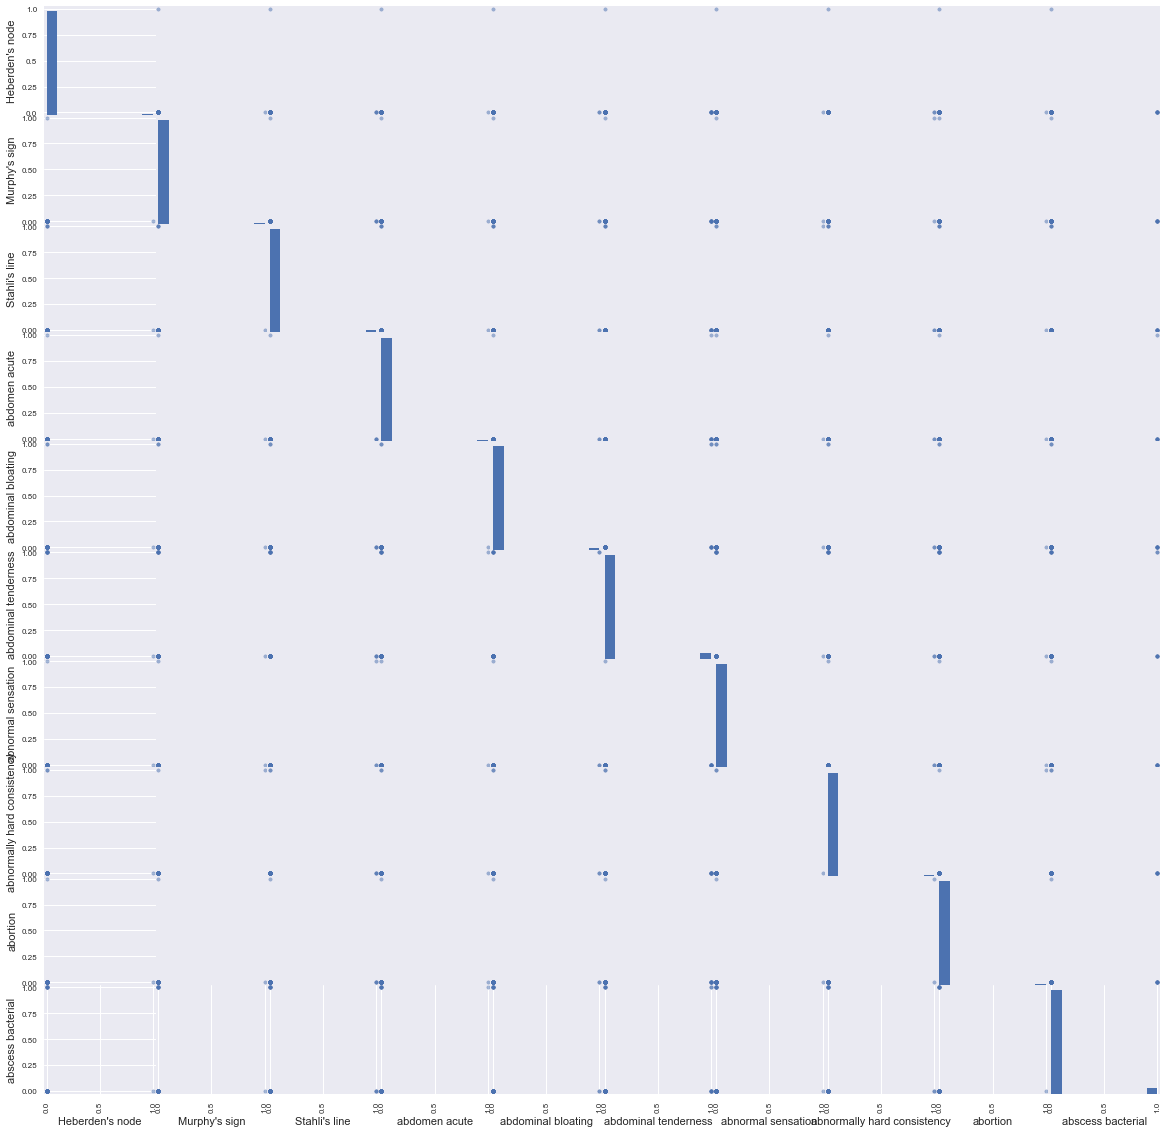

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.scatter_matrix(x.iloc[:,:10], figsize=(20,20))